In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  #Importing the libraries

In [2]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
fulfilment_center = pd.read_csv('fulfilment_center_info.csv')   #Uploading the datasets downloaded from kaggle
meal_info = pd.read_csv('meal_info.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [5]:
test.head() # checking the field present

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
fulfilment_center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
  meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [9]:
train = pd.merge(train,fulfilment_center, on='center_id')
test = pd.merge(test,fulfilment_center, on='center_id')

train = pd.merge(train,meal_info, on='meal_id')
test = pd.merge(test,meal_info, on='meal_id')

In [10]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [12]:
train.isnull().sum() # counting the number of null values in the data. We found that the data had no null values.

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [13]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week', ylabel='num_orders'>

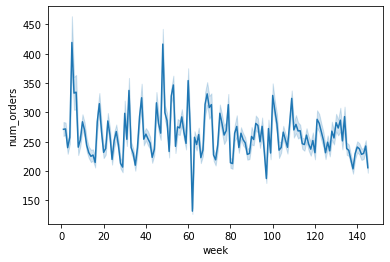

In [14]:
sns.lineplot(train['week'],train['num_orders']) # plotting a line graph of the columns of th edataset

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '13'),
  Text(3, 0, '14'),
  Text(4, 0, '17'),
  Text(5, 0, '20'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '32'),
  Text(13, 0, '34'),
  Text(14, 0, '36'),
  Text(15, 0, '39'),
  Text(16, 0, '41'),
  Text(17, 0, '42'),
  Text(18, 0, '43'),
  Text(19, 0, '50'),
  Text(20, 0, '51'),
  Text(21, 0, '52'),
  Text(22, 0, '53'),
  Text(23, 0, '55'),
  Text(24, 0, '57'),
  Text(25, 0, '58'),
  Text(26, 0, '59'),
  Text(27, 0, '61'),
  Text(28, 0, '64'),
  Text(29, 0, '65'),
  Text(30, 0, '66'),
  Text(31

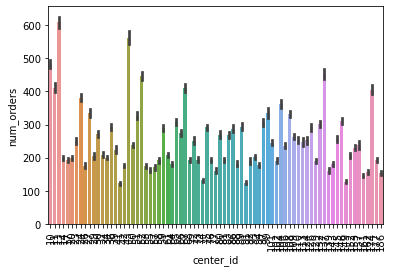

In [15]:
sns.barplot(train['center_id'],train['num_orders'])
plt.xticks(rotation=90)   # plotting bar graph of th ecolumns. We are visualizing the trends of th edatset throgh plots

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>

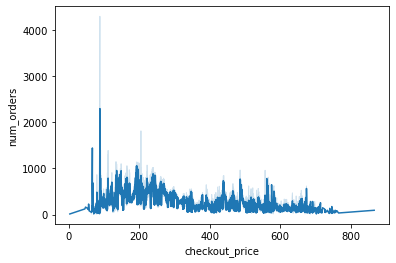

In [16]:
sns.lineplot(train['checkout_price'],train['num_orders'])

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

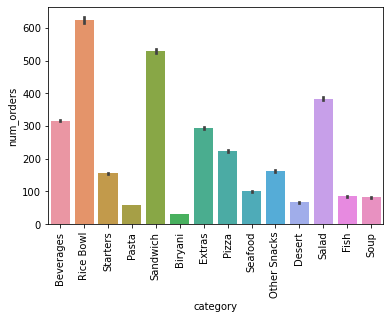

In [17]:
sns.barplot(train['category'],train['num_orders'])
plt.xticks(rotation = '90')

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisine', ylabel='num_orders'>

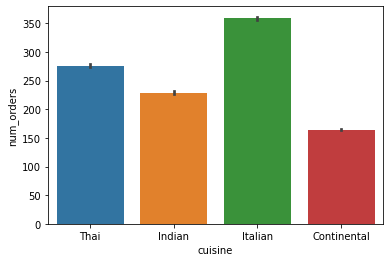

In [18]:
sns.barplot(train['cuisine'],train['num_orders'])
#plt.xticks(rotation = '90')

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region_code', ylabel='num_orders'>

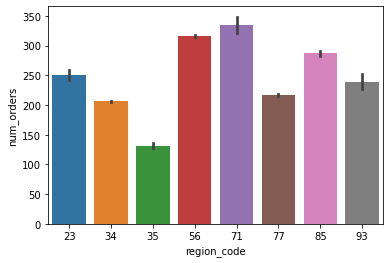

In [19]:
sns.barplot(train['region_code'],train['num_orders'])

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '0.9'),
  Text(1, 0, '1.9'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.4'),
  Text(4, 0, '2.7'),
  Text(5, 0, '2.8'),
  Text(6, 0, '2.9'),
  Text(7, 0, '3.0'),
  Text(8, 0, '3.2'),
  Text(9, 0, '3.4'),
  Text(10, 0, '3.5'),
  Text(11, 0, '3.6'),
  Text(12, 0, '3.7'),
  Text(13, 0, '3.8'),
  Text(14, 0, '3.9'),
  Text(15, 0, '4.0'),
  Text(16, 0, '4.1'),
  Text(17, 0, '4.2'),
  Text(18, 0, '4.4'),
  Text(19, 0, '4.5'),
  Text(20, 0, '4.6'),
  Text(21, 0, '4.7'),
  Text(22, 0, '4.8'),
  Text(23, 0, '5.0'),
  Text(24, 0, '5.1'),
  Text(25, 0, '5.3'),
  Text(26, 0, '5.6'),
  Text(27, 0, '6.3'),
  Text(28, 0, '6.7'),
  Text(29, 0, '7.0')])

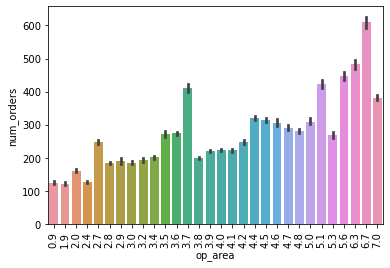

In [20]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation = '90')

C:\Users\sanjai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([400., 450., 500., 550., 600., 650., 700., 750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

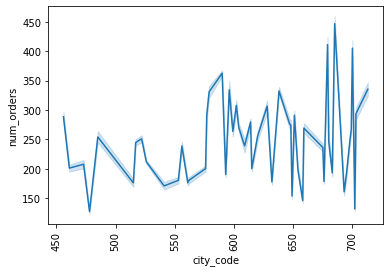

In [21]:
sns.lineplot(train['city_code'],train['num_orders'])
plt.xticks(rotation = '90')

<AxesSubplot:xlabel='num_orders'>

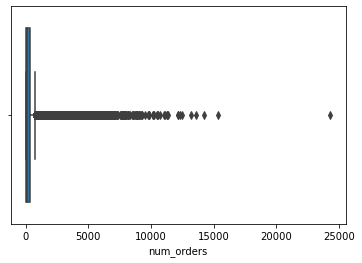

In [22]:
sns.boxplot(x='num_orders',data=train) # we are plotting a boxplot of the number of orders 

<AxesSubplot:xlabel='region_code'>

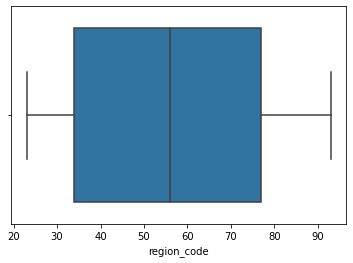

In [23]:
sns.boxplot(x='region_code',data=train)

<AxesSubplot:>

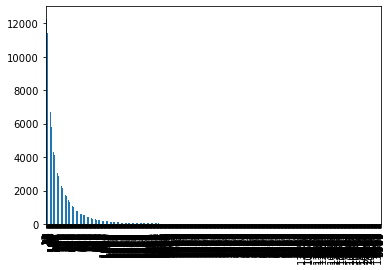

In [24]:
train['num_orders'].value_counts().plot(kind='bar')

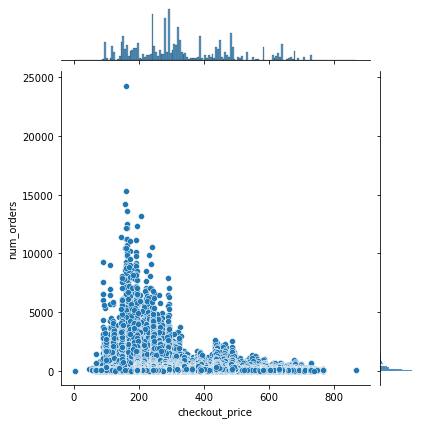

In [25]:
 sns.jointplot(x='checkout_price',y='num_orders',data=train) # we have also done jointplots to find the outlier points

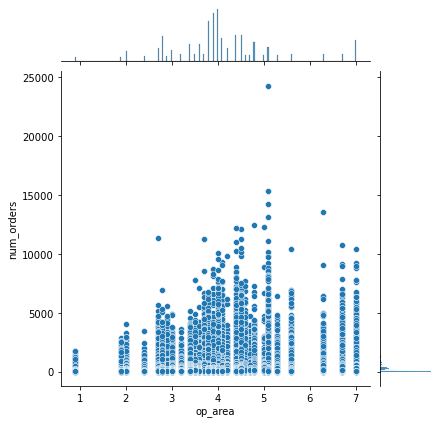

In [26]:
sns.jointplot(x='op_area',y='num_orders',data=train)

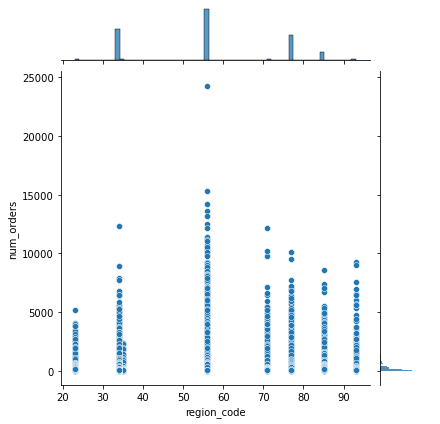

In [27]:
sns.jointplot(x='region_code',y='num_orders',data=train)

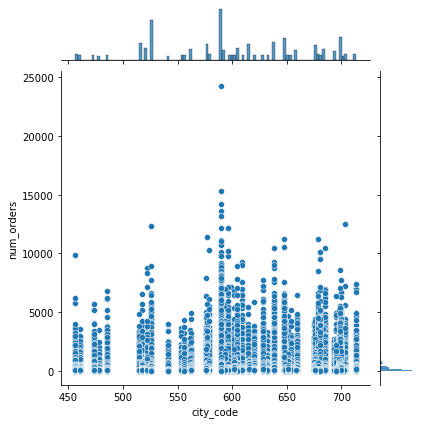

In [28]:
sns.jointplot(x='city_code',y='num_orders',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Rice Bowl'),
  Text(2, 0, 'Starters'),
  Text(3, 0, 'Pasta'),
  Text(4, 0, 'Sandwich'),
  Text(5, 0, 'Biryani'),
  Text(6, 0, 'Extras'),
  Text(7, 0, 'Pizza'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Other Snacks'),
  Text(10, 0, 'Desert'),
  Text(11, 0, 'Salad'),
  Text(12, 0, 'Fish'),
  Text(13, 0, 'Soup')])

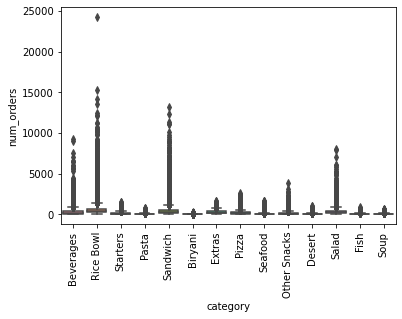

In [29]:
sns.boxplot(x='category',y='num_orders',data=train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Thai'),
  Text(1, 0, 'Indian'),
  Text(2, 0, 'Italian'),
  Text(3, 0, 'Continental')])

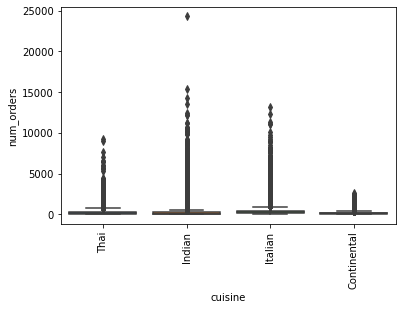

In [30]:
sns.boxplot(x='cuisine',y='num_orders',data=train)
plt.xticks(rotation=90)

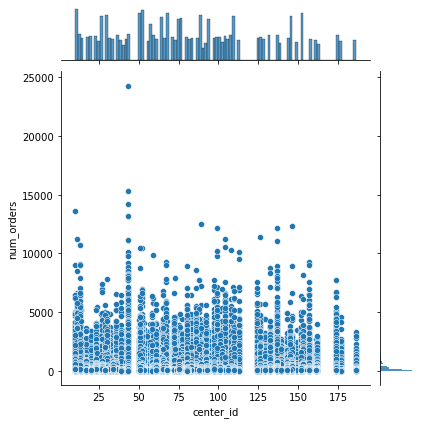

In [31]:
sns.jointplot(x='center_id',y='num_orders',data=train)

In [32]:
print("Total number of centers : ",train['center_id'].nunique())

Total number of centers :  77


In [33]:
print("Total Number of cities: ",train['city_code'].nunique())

Total Number of cities:  51


In [34]:
print("Total Number of operational areas: ",train['op_area'].nunique())

Total Number of operational areas:  30


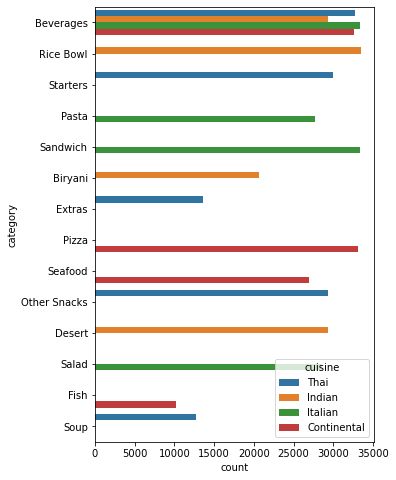

In [35]:
fig, ax = plt.subplots(figsize=(5,8))
sns.countplot(y = train['category'], hue = train['cuisine'], ax=ax)
plt.show()